
# Stat 250 Midterm Exam Fall 2025

**Instructions:** Answer each question in the provided code/markdown cells. Show your work. Use the dataset `support_team_data.csv` and the provided geometric sample where indicated.

**Scenario:** You are a data analyst studying **support team incidents**. You will model discrete incident timing (geometric), explore continuous waiting times, estimate model parameters, compare Exponential vs Normal fits, and build predictive models (linear regression and a regression tree).


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, binom




df = pd.read_csv("support_team_data.csv")

df.head()


,wait_time,open_tickets,agent_experience
0,3,7,18
1,14,12,47
2,6,13,53
3,5,8,24
4,1,15,26


## Problem 1
Assume each hour is an independent trial with incident probability $p = 0.20$. Let $X$ be the number of hours until the **first** incident.

**(a)** Compute $P(X=4)$.  

In [11]:
#geometric as no number of successes
#p*(1-p)**n-1
p = 0.2
n = 4
first = p*(1-p)**(n-1)
print(f'P(X=4) is {first: .4f}')


P(X=4) is  0.1024


**(b)** Compute $P(X \ge 2)$.  


In [10]:
#no incident in hour 1, thus find probability of no successes
#1-p
result = 1-p
print(f'P(X>=2) is {result}')

P(X>=2) is 0.8


**(c)** State and interpret $E[X]$ and $\mathrm{Var}(X)$ for the geometric distribution.  


In [28]:
#E[X] = 1/p
expected = 1/p
print(f'E[X] is {expected}. This means it is expected that it will take {expected} hours for the first incident to occur.')
#Var(X) = (1-p)/(p**2)
variance = (1-p)/(p**2)
print(f'Var(X) is{variance: .1f}. This means that the variability of the expected number of hours can easily change to other hours shown by the large number of{variance: .1f}.')

E[X] is 5.0. This means it is expected that it will take 5.0 hours for the first incident to occur.
Var(X) is 20.0. This means that the variability of the expected number of hours can easily change to other hours shown by the large number of 20.0.


**(d)** In 1–2 sentences, justify why a geometric model is appropriate here.


Geometric model is appropriate as we do not know the exact number of successful trials. Geometric model can tell us the success at least at kth trial.


## Problem 2
You are given **40 wait times**  of hours-until-first-incident in the data frame. (use `df.wait_time` to access it).

**(a)** Derive or state the MLE $\hat p$ for the geometric model$.  


In [43]:
print('𝑝̂ = 1/mean. Mean = summation(X)/n. Thus, 𝑝̂ = n/summation(X).')



𝑝̂ = 1/mean. Mean = summation(X)/n. Thus, 𝑝̂ = n/summation(X).


**(b)** Compute $\hat p$ using the provided data.  


In [44]:
#𝑝̂ = 1/mean
probability = 1/df.wait_time.mean()
print(f'𝑝̂ is {probability: .4f}')


𝑝̂ is  0.2198


**(c)** Interpret $\hat p$ in plain language.


𝑝̂ is the estimated probability of an incident occuring at any given hour.


## Problem 3
Compute and report for `wait_time` the following:  
- mean,
- median,
- standard deviation, and
- IQR.


In [45]:
mean = df.wait_time.mean()
median = df.wait_time.median()
std = df.wait_time.std()
iqr = df.wait_time.quantile(0.75) - df.wait_time.quantile(0.25)
print(f'Mean: {mean: .2f}')
print(f'Median: {median: .2f}')
print(f'Standard Deviation: {std: .2f}')
print(f'IQR: {iqr: .2f}')



Mean:  4.55
Median:  3.00
Standard Deviation:  4.27
IQR:  5.00



## Problem 4
Create a figure to visualize `wait_time`.


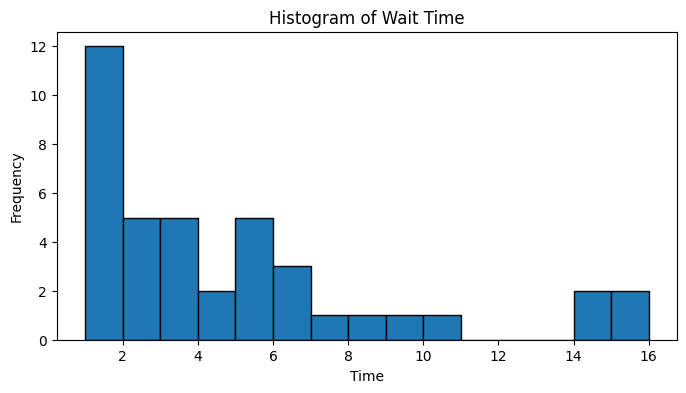

In [58]:
channing = df.wait_time
channing.shape
plt.figure(figsize=(8, 4))
plt.hist(channing, bins=15, edgecolor='black')
plt.title(f'Histogram of Wait Time')
plt.xlabel("Time")
plt.ylabel('Frequency')
plt.show()


## Problem 5
Assume `wait_time` follows an Exponential($\lambda$) model. Compute $\hat\lambda$ using the 40 values.


In [64]:
#lambda = 1/mean = n/summation(X)
n = 40
x = df.wait_time.sum()
lambda_hat = n/x
print(f'lambda hat is {lambda_hat: .4f}')

lambda hat is  0.2198



## Problem 6
Assume `wait_time` follows a Normal($\mu,\sigma^2$) model. Compute $\hat\mu$ and $\hat\sigma$ (MLEs).


In [70]:
#mu = mean
#sigma  = square(1/n * Summation(x - mean)^2)
mu_mle = np.sum(channing)/len(channing)
sigma_mle = np.sqrt(np.sum((channing-mu_mle)**2)/len(channing))
print(f'mu hat is {mu_mle: .4f}')
print(f'sigma hat is {sigma_mle: .4f}')

mu hat is  4.5500
sigma hat is  4.2187



## Problem 7

Overlay the fitted **Exponential($\hat\lambda$)** and **Normal($\hat\mu,\hat\sigma$)** densities on the histogram of `wait_time`.


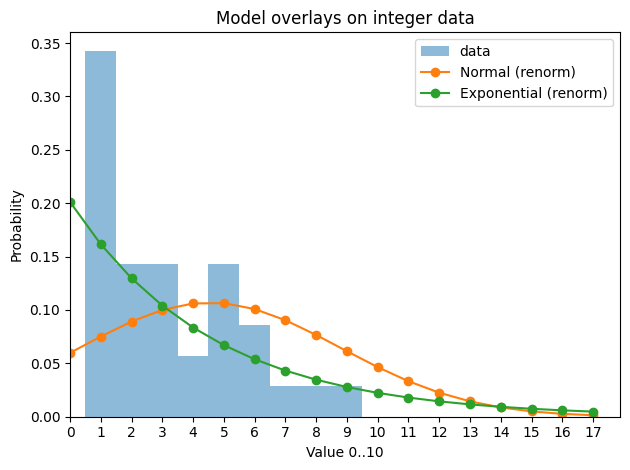

In [87]:
plt.figure()
bins = np.arange(-0.5, 10.5, 1.0)
plt.hist(channing, bins=bins, density=True, alpha=0.5, label="data")

k = np.arange(0, 18)

pdf_n = norm.pdf(k, mu_mle, sigma_mle)
pdf_n = pdf_n / np.sum(pdf_n)
plt.plot(k, pdf_n, marker="o", label="Normal (renorm)")

pdf_e = expon.pdf(k, scale=1/lambda_hat)
pdf_e = pdf_e / np.sum(pdf_e)
plt.plot(k, pdf_e, marker="o", label="Exponential (renorm)")

plt.xticks(k)
plt.xlabel("Value 0..10"); plt.ylabel("Probability")
plt.title("Model overlays on integer data")
plt.legend()
plt.xlim(0)
plt.tight_layout()
plt.show()

## Problem 8

**(a)** Compute **AIC** for both models and state which is preferred (lower is better).



In [90]:
ll_n = np.sum(np.log(norm.pdf(channing, mu_mle, sigma_mle)))
ll_e = np.sum(np.log(expon.pdf(channing, scale=1/lambda_hat)))

def aic(loglik, k): return -2*loglik + 2*k
AIC_norm  = aic(ll_n, 2)
AIC_exp   = aic(ll_e, 1)

print(f"  Normal:         {AIC_norm:.2f}")
print(f"  Exponential:    {AIC_exp:.2f}")
print(f'{AIC_exp: .2f} is better since it is lower.')

  Normal:         232.68
  Exponential:    203.21
 203.21 is better since it is lower.


**(b)** Reconcile AIC with the plot in 1–2 sentences.


The exponential curve fits better with the graph and follows the right skewed graph unlike the normal curve which fits with the AIC being lower for exponential.


## Problem 9
Using the **preferred model** from Q8 (pick one if you don't know):

**(a)** Find the **90th percentile** and interpret it in context.  


In [93]:
lam = lambda_hat
p = expon.cdf(15, scale=1/lam) - expon.cdf(5, scale=1/lam)
q90 = expon.ppf(0.90, scale=1/lam)
print(f"90th percentile ={q90: .4f}")
print(f'That means that it will be within {q90: .2f} hour wait time for 90% of first incidents.')

90th percentile = 10.4768
That means that it will be within  10.48 hour wait time for 90% of first incidents.


**(b)** What percentile corresponds to a wait time of **8 hours**? Show your steps.


In [94]:
#P(X<8) = 1 - e**(-lambda*8) aka CDF of 8 minus 1
percentile = 1.0 - np.exp(-lambda_hat * 8.0)
print(f'The percentile for 8 hours is {percentile: .4f}')

The percentile for 8 hours is  0.8277



## Problem 10
Fit a linear model predicting `wait_time` using both predictors:
$$ Y = \beta_0 + \beta_1(\text{open\_tickets}) + \beta_2(\text{agent\_experience}) + \epsilon. $$

**(a)** Fit the model and report $\hat\beta_0, \hat\beta_1, \hat\beta_2$.  


In [104]:
from sklearn.linear_model import LinearRegression

x = df[['open_tickets', 'agent_experience']]
y = df.wait_time

model = LinearRegression()

model.fit(x, y)

print(f'Intercept (Beta_0): {model.intercept_: .4f}')
print(f'Coefficient (Beta_1): {model.coef_[0]: .4f}')
print(f'Coefficient (Beta_2): {model.coef_[1]: .4f}')

Intercept (Beta_0):  3.6492
Coefficient (Beta_1): -0.2048
Coefficient (Beta_2):  0.0924


**(b)** Interpret $\beta_1$ and $\beta_2$ in context.  


𝛽1 is the expected change of Y (wait time) when X (open tickets) changes holding all else constant (agent experience). 𝛽2 is the expected change of Y (wait time) when X (agent experience) changes holding all else constant (open tickets).


## Problem 11
Fit a regression tree predicting `wait_time` from `open_tickets` and `agent_experience`. Use a max depth of 3.

**(a)** Fit and display the tree.  


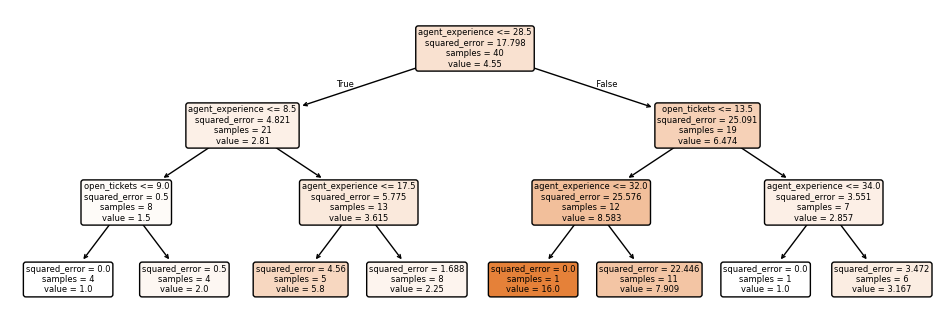

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

reg_tree = DecisionTreeRegressor(max_depth=3)
reg_tree.fit(x, y)

plt.figure(figsize=(12, 4))
tree.plot_tree(reg_tree, fontsize=6, filled=True, feature_names=x.columns, rounded=True)
plt.show()


**(b)** Choose one internal node and describe all four values listed. (Note, you need to use the `tree` package as in the class code to get these values)


I choose the first true (left) internal node with agent_experience <=8.5. First value will tell us the split. The values that have an agent_experience that is less than or equal to 8.5 will move on to the left (true) boxes and vise versa for the right boxes. Squared_error shows how much variation is in the box. Since the number is a little higher of 4.821, the values are pretty varied in this box. The samples will tell us how many values are in the node which is 21. The value tells us the mean of the mode which is 2.81 hours for wait times.